<a href="https://colab.research.google.com/github/utkarshg1/Deep-Learning-6-8pm-Tue-Wed/blob/main/Restaurant_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restauraunt Reviews Sentiment Analysis Project

In [27]:
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the tsv(Tab seperated values)

In [28]:
import pandas as pd
df = pd.read_csv('/content/Restaurant_Reviews.tsv', sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Preprocessing the statements
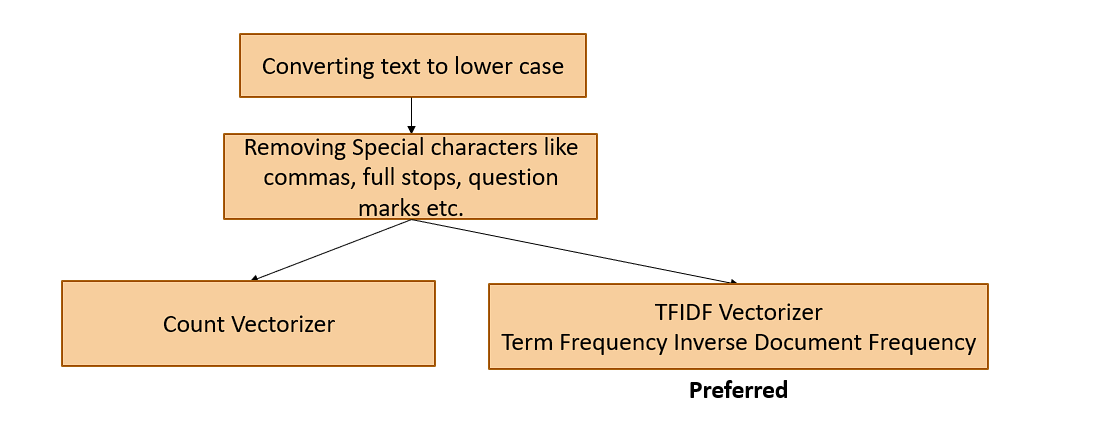

In [30]:
st = 'HI all ,Welcome to ETLHive!...'

In [31]:
st2 = st.lower()
st2

'hi all ,welcome to etlhive!...'

In [32]:
import re
st3 = re.sub("[^a-z ]", "", st2)
st3

'hi all welcome to etlhive'

### Create a function to preprocess the text data

In [33]:
def preprocess_text(st):
  st2 = st.lower()
  st3 = re.sub("[^a-z ]", "", st2)
  return st3

In [34]:
preprocess_text("Welcome to SENTIMENT Analysis class!...")

'welcome to sentiment analysis class'

### Apply the function to dataframe

In [35]:
df['pre'] = df['Review'].apply(preprocess_text)

In [36]:
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


### Apply tfidf vectorizer on preprocessed text

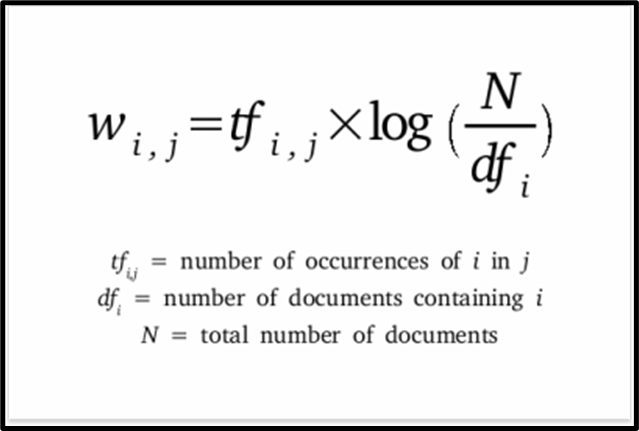

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X_pre = tf.fit_transform(df['pre']).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
X_pre.shape

(1000, 2046)

In [39]:
Y = df['Liked']
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

### Apply train test split

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y,
                                                test_size=0.2,
                                                random_state=21)

In [41]:
xtrain.shape

(800, 2046)

In [42]:
xtest.shape

(200, 2046)

In [43]:
xtrain.shape[1]

2046

### Creating a neural network

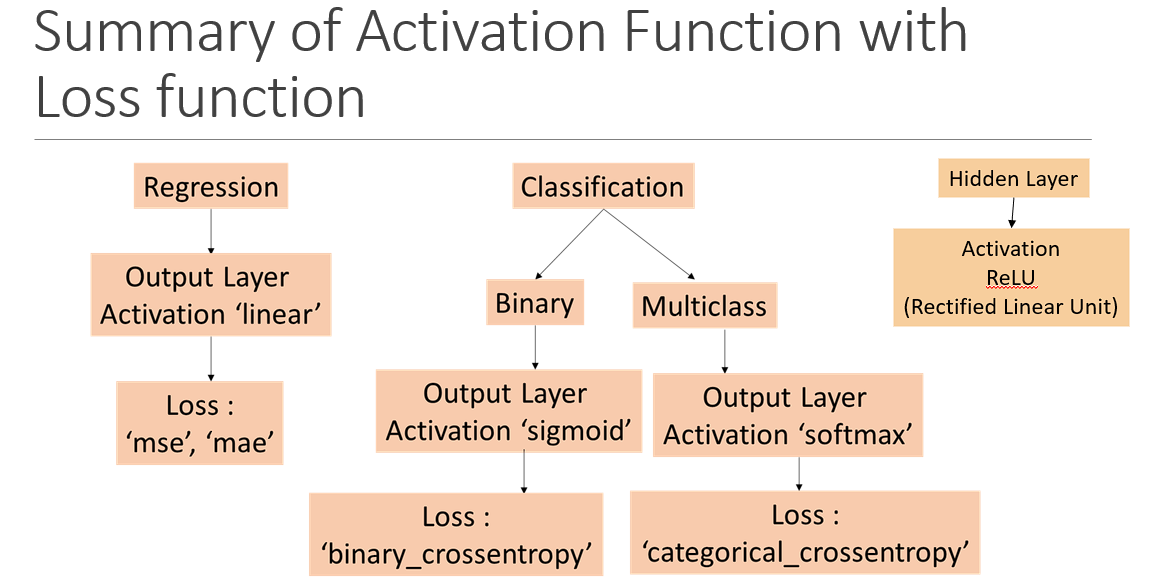

In [44]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [45]:
model = Sequential()

# Create input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Create a Dense Layer 1
model.add(Dense(units=128, activation='relu'))
# Add a dropout layer
model.add(Dropout(rate=0.5))
# Create a Dense Layer 2
model.add(Dense(units=64, activation='relu'))
# Add a dropout layer
model.add(Dropout(rate=0.4))
# Output layer use sigmoid because of binary classification
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               262016    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 270337 (1.03 MB)
Trainable params: 270337 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
es = EarlyStopping(monitor='val_loss', patience=15)

In [49]:
hist = model.fit(xtrain, ytrain, validation_split=0.1,
                 epochs=100, callbacks=[es])

Epoch 1/100
23/23 [==============================] - 1s 16ms/step - loss: 0.6920 - accuracy: 0.5417 - val_loss: 0.6944 - val_accuracy: 0.3875
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 0.6807 - accuracy: 0.6097 - val_loss: 0.6927 - val_accuracy: 0.3750
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6510 - accuracy: 0.6653 - val_loss: 0.6653 - val_accuracy: 0.5750
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5599 - accuracy: 0.8625 - val_loss: 0.5928 - val_accuracy: 0.7250
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3946 - accuracy: 0.9333 - val_loss: 0.5055 - val_accuracy: 0.7875
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2307 - accuracy: 0.9583 - val_loss: 0.4318 - val_accuracy: 0.8375
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1282 - accuracy: 0.9764 - val_loss: 0.4159 - val_accuracy: 0.8250
Epoch 8/100


### Evaluate the model

In [50]:
model.evaluate(xtrain, ytrain)

25/25 [==============================] - 0s 4ms/step - loss: 0.0778 - accuracy: 0.9737


[0.07781241089105606, 0.9737499952316284]

In [51]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.7850


[0.5539002418518066, 0.7850000262260437]

### Predict the probability

In [52]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

7/7 [==============================] - 0s 2ms/step


In [53]:
yprob_train[0:5]

array([[9.9809748e-01],
       [9.9997270e-01],
       [9.9999964e-01],
       [4.1803563e-05],
       [2.1113775e-04]], dtype=float32)

In [54]:
yprob_test[0:5]

array([[3.7838608e-02],
       [2.0075252e-04],
       [9.9275225e-01],
       [9.9996638e-01],
       [9.9998087e-01]], dtype=float32)

### Predict the results
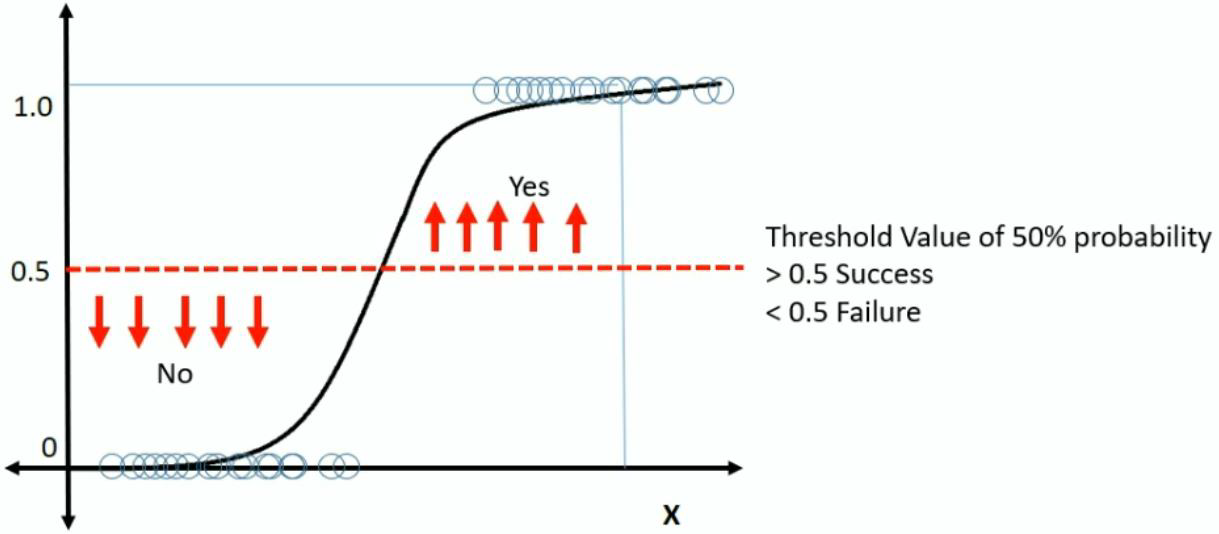

In [55]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

In [56]:
ypred_train[0:5]

[1, 1, 1, 0, 0]

In [57]:
ytrain[0:5]

108    1
134    1
585    1
42     0
990    0
Name: Liked, dtype: int64

In [58]:
ypred_test[0:5]

[0, 0, 1, 1, 1]

In [59]:
ytest[0:5]

492    0
383    0
856    1
834    1
603    1
Name: Liked, dtype: int64

### Plot the confusion matrix

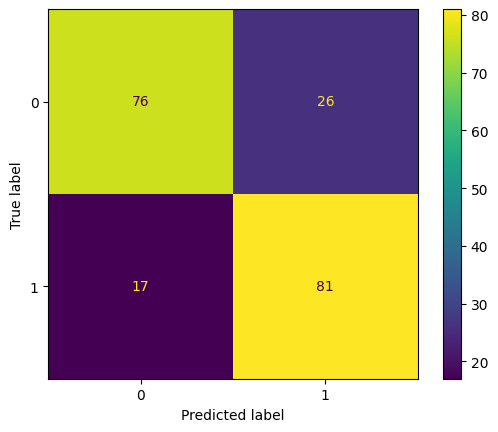

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print the classification report

In [62]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       102
           1       0.76      0.83      0.79        98

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



### Predict the userdefined sentiments

In [66]:
def predict_sentiment(model, tf):
  st = input("Please enter the review : ")
  st2 = preprocess_text(st)
  xnew = tf.transform([st2]).toarray()
  prob = model.predict([xnew])
  print(f'Probability that statement is positive : {prob}')
  if prob>=0.5:
    print('The given Review is POSITIVE')
  else:
    print('The given Review is NEGATIVE')

In [67]:
predict_sentiment(model, tf)

Please enter the review : Good Place , I really liked their food!...
1/1 [==============================] - 0s 65ms/step
Probability that statement is positive : [[0.9999035]]
The given Review is POSITIVE


In [68]:
predict_sentiment(model, tf)

Please enter the review : I did not like the ambience of the place. Bad Experience!...
1/1 [==============================] - 0s 23ms/step
Probability that statement is positive : [[0.00130528]]
The given Review is NEGATIVE


### Save the model for future use

In [69]:
model.save('SentimentModel.keras')

### Loading model for future use

In [70]:
from keras.models import load_model
m = load_model("/content/SentimentModel.keras")
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               262016    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 270337 (1.03 MB)
Trainable params: 270337 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
